In [ ]:
# -*- coding: utf-8 -*-

import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [3]:
raw_df = pd.read_csv("data/posco1.csv")   #read data
raw_df.columns = ['date', 'stand_price', 'fluc_price', 'fluc_rate']
col_total = len(raw_df['date'])   # length of column
raw_df.head()
df = raw_df   # change dataframe with all variables
df.head()

,date,stand_price,fluc_price,fluc_rate
0,2001-02-02,17.36,0.00,0.00
1,2001-03-02,17.36,0.00,0.00
2,2001-03-30,17.36,0.00,0.00
3,2001-05-04,18.10,0.74,4.26
4,2001-06-01,18.10,0.00,0.00


In [4]:
for i in range(col_total): 
    #print(raw_df.values[i,0][0:4])
    df.loc[i,'year'] = int(raw_df.values[i,0][0:4])
    df.loc[i,'month'] = raw_df.values[i,0][5:7]
    df.loc[i,'day'] = raw_df.values[i,0][8:10]
df.head()

# Data slicing
sub_df_09 = df.loc[df.year>2008, :]
Dataxy = np.array(sub_df_09.stand_price)
sample_size = len(Dataxy)

491

In [5]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [9]:
# hyperparameter
input_size = 1
num_steps = 15
hidden_size = 5
lstm_size = 128
output_size = 1
learning_rate = 0.01
iterations = 500
num_layers = 2

# Data preparation
seq = MinMaxScaler(Dataxy)   # Normalization: unless being out of scale?
#seq = Dataxy
seq = [np.array(seq[i * input_size: (i + 1) * input_size]) 
       for i in range(len(seq) // input_size)]

# Split into groups of `num_steps`
dataX = np.array([seq[i: i + num_steps] for i in range(len(seq) - num_steps)])
dataY = np.array([seq[i + num_steps] for i in range(len(seq) - num_steps)])

tf.reset_default_graph()

# train/test split: take the latest 10% of data as the test data
train_size = int(len(dataY) * 0.9)
#valid_size = train_size - int(train_size*0.9)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

# input place holders
X = tf.placeholder(tf.float32, [None, num_steps, input_size])
Y = tf.placeholder(tf.float32, [None, input_size])

# input_size =   #sliding window of a fixed size, use w(t) to predict w(t-1)
### there is no overlap between two consecutive windows
### input_size 만큼의 데이터가 w(t)안에 포함
# num_steps =2 means [w(t), w(t+1)] -> w(t+2)
#print(seq)

[step: 0] loss: 110.24334716796875
[step: 1] loss: 223.84767150878906
[step: 2] loss: 192.68385314941406
[step: 3] loss: 106.64203643798828
[step: 4] loss: 62.71196746826172
[step: 5] loss: 15.720846176147461
[step: 6] loss: 115.11505126953125
[step: 7] loss: 13.651721954345703
[step: 8] loss: 43.591835021972656
[step: 9] loss: 58.69857406616211
[step: 10] loss: 59.60820770263672
[step: 11] loss: 51.75442886352539
[step: 12] loss: 38.55780029296875
[step: 13] loss: 23.302488327026367
[step: 14] loss: 13.598759651184082
[step: 15] loss: 24.167165756225586
[step: 16] loss: 29.397428512573242
[step: 17] loss: 16.91421890258789
[step: 18] loss: 12.682475090026855
[step: 19] loss: 14.857718467712402
[step: 20] loss: 17.351219177246094
[step: 21] loss: 17.63351821899414
[step: 22] loss: 15.301581382751465
[step: 23] loss: 11.188130378723145
[step: 24] loss: 7.272862434387207
[step: 25] loss: 6.271735668182373
[step: 26] loss: 8.538690567016602
[step: 27] loss: 8.506352424621582
[step: 28] lo

[step: 228] loss: 0.9371980428695679
[step: 229] loss: 0.9331591129302979
[step: 230] loss: 0.9291520714759827
[step: 231] loss: 0.9251768589019775
[step: 232] loss: 0.9212334752082825
[step: 233] loss: 0.9173216819763184
[step: 234] loss: 0.9134417772293091
[step: 235] loss: 0.9095925092697144
[step: 236] loss: 0.9057737588882446
[step: 237] loss: 0.9019843339920044
[step: 238] loss: 0.8982234001159668
[step: 239] loss: 0.8944900035858154
[step: 240] loss: 0.8907824158668518
[step: 241] loss: 0.8870992660522461
[step: 242] loss: 0.8834390044212341
[step: 243] loss: 0.8797997236251831
[step: 244] loss: 0.8761797547340393
[step: 245] loss: 0.8725763559341431
[step: 246] loss: 0.8689879775047302
[step: 247] loss: 0.8654120564460754
[step: 248] loss: 0.8618463277816772
[step: 249] loss: 0.8582881689071655
[step: 250] loss: 0.8547354340553284
[step: 251] loss: 0.8511855602264404
[step: 252] loss: 0.8476360440254211
[step: 253] loss: 0.8440843224525452
[step: 254] loss: 0.8405278921127319
[

[step: 451] loss: 0.5739704370498657
[step: 452] loss: 0.5717666745185852
[step: 453] loss: 0.5695687532424927
[step: 454] loss: 0.5673761367797852
[step: 455] loss: 0.5651897192001343
[step: 456] loss: 0.5630075931549072
[step: 457] loss: 0.5608311891555786
[step: 458] loss: 0.5586600303649902
[step: 459] loss: 0.556493878364563
[step: 460] loss: 0.5543327331542969
[step: 461] loss: 0.5521752238273621
[step: 462] loss: 0.550021767616272
[step: 463] loss: 0.5478715896606445
[step: 464] loss: 0.545724630355835
[step: 465] loss: 0.5435801148414612
[step: 466] loss: 0.5414369702339172
[step: 467] loss: 0.5392956137657166
[step: 468] loss: 0.5371547341346741
[step: 469] loss: 0.5350140333175659
[step: 470] loss: 0.5328727960586548
[step: 471] loss: 0.5307300686836243
[step: 472] loss: 0.5285857915878296
[step: 473] loss: 0.5264390110969543
[step: 474] loss: 0.5242892503738403
[step: 475] loss: 0.522136390209198
[step: 476] loss: 0.5199794769287109
[step: 477] loss: 0.5178182125091553
[step

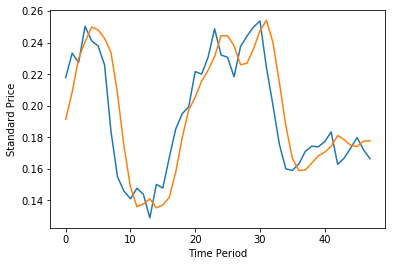

In [10]:
# build a stacked LSTM network
def create_one_lstm_cell():
    return tf.contrib.rnn.LSTMCell(lstm_size, state_is_tuple=True)

multi_cells = tf.contrib.rnn.MultiRNNCell([create_one_lstm_cell() for _ in range(num_layers)], state_is_tuple=True
                ) if num_layers > 1 else create_one_lstm_cell()

outputs, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_size, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares

# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}, predict:{}".format(rmse_val, test_predict))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Standard Price")
    plt.show()
    saver = tf.train.Saver()
    saver.save(sess, "/tmp/model.ckpt")


In [ ]:
# # Before transpose, val.get_shape() = (batch_size, num_steps, lstm_size)
# # After transpose, val.get_shape() = (num_steps, batch_size, lstm_size)
# outputs = tf.transpose(outputs, [1, 0, 2])
# # last.get_shape() = (batch_size, lstm_size)
# last = tf.gather(outputs, int(outputs.get_shape()[0]) - 1, name="last_lstm_output")

# weight = tf.Variable(tf.truncated_normal([lstm_size, input_size]))
# bias = tf.Variable(tf.constant(0.1, shape=[input_size]))
# prediction = tf.matmul(last, weight) + bias

    
# loss = tf.reduce_mean(tf.square(prediction - targets))
# optimizer = tf.train.RMSPropOptimizer(learning_rate)
# minimize = optimizer.minimize(loss)